---
title: Decision Trees
format:
    html:
        embed-resources: true
        code-fold: true
---

## Introduction

Similar to the Naive Bayes tab, I will be using decision trees to predict the types of patterns based off of the given information such as amount of yards, size of the needles, and gauge. I was only able to reach a predictive capability of 47% or so with the Naive Bayes model so I'm hoping to improve upon the predictive capability and make it better than a coin toss.

## Methods
Decision trees work by making splits in the data based off of a minimizing algorithm of the residual sum of squares. That's a mouthful, but it keeps making these decisions until it is able to categorize the data based off of the hyperparameters given.

Decision trees are also a weak algorithm which means that each time a tree is run there will be slight differences in its arrangement. This also allows it to be used for more advanced machine learning methods such as boosting and bagging. I will later take a boosting, or random forest, approach to improve the predictive capability of the model.

When discussing the hyperparameters of the decision trees, the main changes you can make are adjustments to the maximum depth of the tree, the threshold for splitting the data, and what features to use in the first place. I will be running another feature selection test to see what works best for decision trees. I will be mostly leaving the threshold for splitting data to the default values but I will be testing an optimal depth for the trees.

To mention the boosting approach again, boosting works by accumulating trees with different splits and then taking the most likely results as the classifier. To be clear, these splits are not random and instead try to make up for the mistakes of the previous algorithms, this cumulative approach covers some of the weaknesses of decision trees to begin with.

I look forward to seeing if this approach will be more impactful on the data and give better results.

In [20]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
import numpy as np
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


Below I have some more information about the data which is similarly covered in previous tabs.

In [21]:
data = pd.read_csv("../data/pattern_data_updated.csv")
data.shape
data.columns

Index(['Unnamed: 0', 'comments_count', 'currency', 'price', 'currency_symbol',
       'free', 'published', 'difficulty_average', 'favorites_count',
       'projects_count', 'queued_projects_count', 'gauge', 'gauge_divisor',
       'gauge_pattern', 'row_gauge', 'id', 'name', 'permalink',
       'rating_average', 'rating_count', 'yardage', 'yardage_max',
       'yarn_weight_description', 'yarn_weight', 'needle_sizes_us',
       'needle_sizes_metric', 'hook_size', 'needle_sizes_name', 'craft',
       'pattern_type', 'pattern_desc', 'category_permalink',
       'category_parent_permalink', 'price_adjusted'],
      dtype='object')

In [22]:
df_info = pd.concat([data.dtypes,data.min(),data.mean(),data.max()],axis = 1)
df_info.rename(columns = {0:"dtypes",1:"min",2:"mean",3:"max"},inplace = True)
df_info

,dtypes,min,mean,max
Unnamed: 0,int64,1,4.815500e+04,96309
comments_count,int64,0,6.735549e+00,1509
currency,object,NaN,NaN,NaN
price,float64,0.0,7.597368e+00,1760.0
currency_symbol,object,NaN,NaN,NaN
free,object,False,3.130373e-01,True
published,object,NaN,NaN,NaN
difficulty_average,float64,0.0,2.055180e+00,8.75
favorites_count,int64,0,1.375928e+03,92747
projects_count,int64,0,1.207596e+02,39438


## Class Distribution

I will be doing a 80-20 train-test split for my data and using my features to predict the type of pattern, the extent of which is listed below. Having a target column with so many values is limiting the impact of the model itself but I believe that this application will have more impact than guessing whether or not a pattern was free for instance. There are also some pattern groups which are heavily over or underrepresented which could skew results to some extent. For instance there are very few jackets and tens of thousands of hats. I will see if this has an effect and see if this model type will be effective.

In [23]:
data['pattern_type'].value_counts()

shawl         14261
pullover      12403
hat           12205
socks         11989
gloves         5641
cardigan       5567
child          4960
toys           4564
scarf          4159
other          3526
home           3418
baby           3308
blanket        2876
tee            1671
camisole       1598
bag            1134
dishcloth      1047
vest            790
pet             533
dress-suit      194
shrug           182
jacket          175
skirt            93
naughty          15
Name: pattern_type, dtype: int64

In [24]:
X = data[["yardage","yardage_max","gauge","needle_sizes_us"]]
Y = data[["pattern_type"]]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = .2,random_state = 1)

print(type(x_train), x_train.shape)
print(type(y_train), y_train.shape)
print(type(x_test), x_test.shape)
print(type(y_test), y_test.shape)


<class 'pandas.core.frame.DataFrame'> (77047, 4)
<class 'pandas.core.frame.DataFrame'> (77047, 1)
<class 'pandas.core.frame.DataFrame'> (19262, 4)
<class 'pandas.core.frame.DataFrame'> (19262, 1)


## Baseline Model

I will be running a single decision tree with 4 classifers as a baseline model without any boosting or hyperparameter tuning in order to show the expected results.

In [25]:
from sklearn import tree
from sklearn.metrics import classification_report

model = tree.DecisionTreeClassifier()
model = model.fit(x_train,y_train)
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)


In [26]:

print(classification_report(y_train,yp_train,output_dict=True)['accuracy'])
print(classification_report(y_test,yp_test,output_dict=True)['accuracy'])


0.5263670227263878
0.4508358425916312


Looking at the accuracy values for the training and test sets we can see that this model has about equal performance to the Naive Bayes model in this state. The training set is only able to achieve a predictive capability of 52% percent which is incredibly low for a trained model but on par for this data. To follow this, there may be some overfitting to the training set as the test data is only 45 percent accurate. This could also be due to misfitting with the large number of variables but that drop between the two is fairly harrowing. I'll now take some time to pick strong hyperparameters and boost this model.

## Feature Selection

For feature selection I'm planning on doing a test for maximum depth and also for feature selection. I noticed feature selection changed alot model by model so what was needed for decision trees might be different than the optimal ones for the naive bayes models. I will print out the best subset for reference.

In [27]:
def train_DT_model(X,Y,i_print=False):

    if(i_print):
        print(X.shape,Y.shape)

    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = .2,random_state = 1)

    # INITIALIZE MODEL 
    model = tree.DecisionTreeClassifier()

    # TRAIN MODEL 
    model.fit(x_train,y_train)

    # LABEL PREDICTIONS FOR TRAINING AND TEST SET 
    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)

    acc_train= accuracy_score(y_train, yp_train)*100
    acc_test= accuracy_score(y_test, yp_test)*100

    if(i_print):
        print(acc_train,acc_test)

    return (acc_train,acc_test)

In [28]:
x = data[["price",
        "free",
        "difficulty_average",
        "gauge","gauge_divisor","row_gauge",
        "rating_average","rating_count",
        "yardage","yardage_max",
        "yarn_weight_description",
        "needle_sizes_metric",
        "pattern_type"]].dropna()
y = x["pattern_type"]
x.drop("pattern_type",inplace = True,axis = 1)
x["free"] = x["free"].astype("category")

import itertools

subsets = []
list1 = [*range(1,x.shape[1])]; #print(list1)

train_accs_g = []
test_accs_g = []
num_features_g = []
best_test_acc_g = 0

# x.shape[1]+1
for l in range(1,x.shape[1]+1):
    for subset in itertools.combinations(x.columns, l):
        train_acc, test_acc = train_DT_model(x.loc[:,list(subset)],y)
        train_accs_g.append(train_acc)
        test_accs_g.append(test_acc)
        num_features_g.append(len(list(subset)))
        if test_acc > best_test_acc_g:
            best_test_acc_g = test_acc
            best_subset_g = list(subset)

print(best_subset_g)


['price', 'gauge', 'gauge_divisor', 'row_gauge', 'rating_count', 'yardage', 'yardage_max', 'yarn_weight_description', 'needle_sizes_metric']


Given this optimal set, I will be checking for the accuracy across many different maximum ranges to see if there is a point where the tree becomes overfitted to the data. Lowering the max depth will also help speed up the boosting process.

Text(0, 0.5, 'ACCURACY (Y=0): Training (blue) and Test (red)')

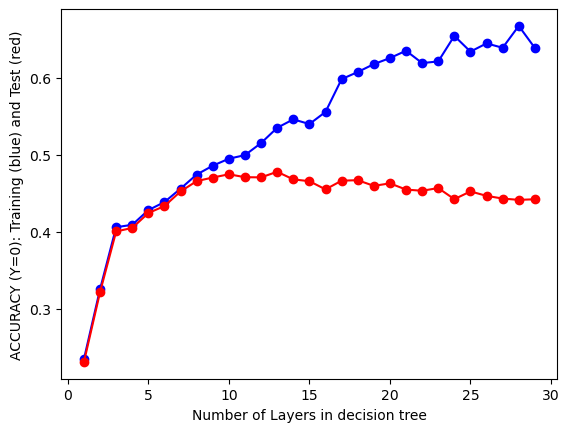

In [29]:
test_results=[]
train_results=[]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data[best_subset_g],Y,test_size = .2,random_state = 1)

for num_layer in range(1,30):
    model = tree.DecisionTreeClassifier(max_depth=num_layer)
    model = model.fit(x_train,y_train)

    yp_train=model.predict(x_train)
    yp_test=model.predict(x_test)

    test_results.append([num_layer,accuracy_score(y_test, yp_test)])
    train_results.append([num_layer,accuracy_score(y_train, yp_train)])

test_df = pd.DataFrame(test_results)
train_df = pd.DataFrame(train_results)

plt.plot(train_df.iloc[:,0],train_df.iloc[:,1],"o-b")
plt.plot(test_df.iloc[:,0],test_df.iloc[:,1],"o-r")

plt.xlabel("Number of Layers in decision tree")
plt.ylabel("ACCURACY (Y=0): Training (blue) and Test (red)")

From looking at the graph, there are deviations in the accuracy of the training and testing data around 7 layers and widens a bit until splitting upward and downwards after 8. This implies that 8 as a depth works best in order to maximize the accuracy of the testing data set and avoid overfitting. We can see that as the maximum depth increases the training accuracy increases concurrently but after a certain point the testing accuracy starts decreasing, this is a pretty good indicator that there is overfitting and is a pretty good visualization of its perils. So, going forward I will be using a max depth of 8 layers. I will quickly rerun the base model to show the benefits.

In [30]:
from sklearn import tree
from sklearn.metrics import classification_report

model = tree.DecisionTreeClassifier(max_depth = 8)
model = model.fit(x_train,y_train)
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

print(classification_report(y_train,yp_train,output_dict=True)['accuracy'])
print(classification_report(y_test,yp_test,output_dict=True)['accuracy'])

0.47336041636922915
0.46537223548956497


The testing accuracy rose to 46% while the testing accuracy remained similar. This is fine though and a definite improvement on the other data set, especially with the test and training accuracies being more similar. I will no go forward with the Random Forest method to try to improve this value and increase the accuracy of both of the datasets.

## Random Forest Trial
I'm going to jump right into the Random Forest. I'll start by testing hyperparameters out of curiosity then I'm going to use that value to get the best prediction for the test data. I also found around 100 trees to be sufficient with more than that giving similar results for longer runtimes.

Text(0, 0.5, 'ACCURACY (Y=0): Training (blue) and Test (red)')

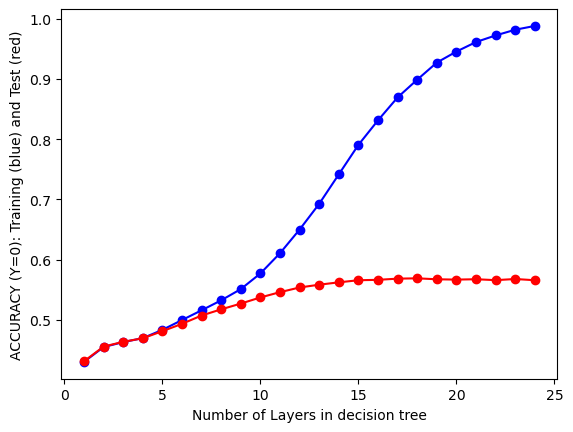

In [31]:
from sklearn.ensemble import RandomForestClassifier

X = data[best_subset_g]
X["pattern_type"] = data["pattern_type"]

X = X.dropna()

Y = X[["pattern_type"]]
X = X.drop("pattern_type",axis = 1)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = .2,random_state = 1)

test_results=[]
train_results=[]

for i in range(1,25):
    num_layer = i
    clf = RandomForestClassifier(max_depth = i, n_estimators= 100, random_state=0)
    clf.fit(x_train,y_train.to_numpy())
    yp_train = clf.predict(x_train)
    yp_test = clf.predict(x_test)

    test_results.append([num_layer,accuracy_score(y_test, yp_test)])
    train_results.append([num_layer,accuracy_score(y_train, yp_train)])

test_df = pd.DataFrame(test_results)
train_df = pd.DataFrame(train_results)

plt.plot(train_df.iloc[:,0],train_df.iloc[:,1],"o-b")
plt.plot(test_df.iloc[:,0],test_df.iloc[:,1],"o-r")

plt.xlabel("Number of Layers in decision tree")
plt.ylabel("ACCURACY (Y=0): Training (blue) and Test (red)")



So it is looking like roughly 15 as a max depth is best for test accuracy in the random forest, there are marginal increases but I'm valuing closeness between the test and training models. I think I will use a dept of around 12. The difference between test and train might be different but I'm hoping it will improve the test overall. Now to see the accuracy at that amount I will run a final random forest.

In [32]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = .2,random_state = 1)

clf = RandomForestClassifier(max_depth = 12, n_estimators= 500, random_state=0)
clf.fit(x_train,y_train)
yp_train = clf.predict(x_train)
yp_test = clf.predict(x_test)

print(classification_report(y_train,yp_train,output_dict=True)['accuracy'])
print(classification_report(y_test,yp_test,output_dict=True)['accuracy'])

0.6482692162346005
0.5541531252361878


Alright, there was some improvement with 55 percent accuracy which is better than the decision tree but not quite as high as I would hope overall. Anyhow, this isn't the worst but it is a bit disappointing showing for random forests in this case, only improving the model by 10% accuracy.

## Final results

So after fitting the model, hyperparameter tuning, and boosting. We managed to up the baseline of 46% accuracy to 55% which does meet a coinflip criteria but isn't as good as I would have hoped. This is pretty low but I think the best thing to do is recheck the data to increase the amount of rows and the accuracy of the data. There seems to be a pretty hard cap here which cannot be breached without more and better data. Overfitting clearly becomes a problem after 50% or so that may be something to watch out for.

## Conclusions

Decision trees are a very interesting classifying method which take a branching and hierarchical approach in comparison to the other more optimization focused models. I personally made it my task to use classifying random forests to try to predict the type of a pattern based on some sample pattern information and was succesful at improving upon previous methods.

I was marginally successful in my analysis with a slightly better than coin flip success rate. This means that given the information about a knitting pattern there is a 55% chance that the algorithm guesses the type of pattern correctly. This wouldn't fly in a market setting as there is still way too much variability but I still consider it a success as it would be hard to even reach half that success rate just using human intuition. Random forests were also able to improve upon the previous record which shows the value of the model in the larger context.
